In [2]:
import folium

### 1. ride_sum& off_sum

In [1]:
#데이터 불러오기
# 415423 rows × 49 columns
raw_data = pd.read_csv('raw_train.csv')
raw_data.tail(2)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,...,ride67,ride89,ride1011,off67,off89,off1011,ride_sum,off_sum,bus_route_id_sum,bus_route_id_all_sum
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,120
415422,415422,2019-09-30,32820000,시내,6115100,서귀포시외버스터미널,33.24873,126.50799,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,15,440


In [16]:
#날짜별로 각 변수를 더한 데이터 프레임 생성
grouped_date=raw_data.groupby('date').sum()
grouped_date.tail(2)

,id,bus_route_id,station_code,latitude,longitude,ride6,ride7,ride8,ride9,ride10,...,ride67,ride89,ride1011,off67,off89,off1011,ride_sum,off_sum,bus_route_id_sum,bus_route_id_all_sum
date,,,,,,,,,,,,,,,,,,,,,
2019-09-29,4770509086,324548340000,529153777,405197.419709,1.534118e+06,2673.0,4629.0,6641.0,7300.0,7444.0,...,7302.0,13941.0,14654.0,3868.0,8874.0,10035.0,35897.0,22777.0,145416,4827380
2019-09-30,6472420262,429040470000,644303713,530818.941999,2.009878e+06,5333.0,16394.0,15699.0,11803.0,10565.0,...,21727.0,27502.0,20070.0,8199.0,17887.0,14128.0,69299.0,40214.0,234444,6191440


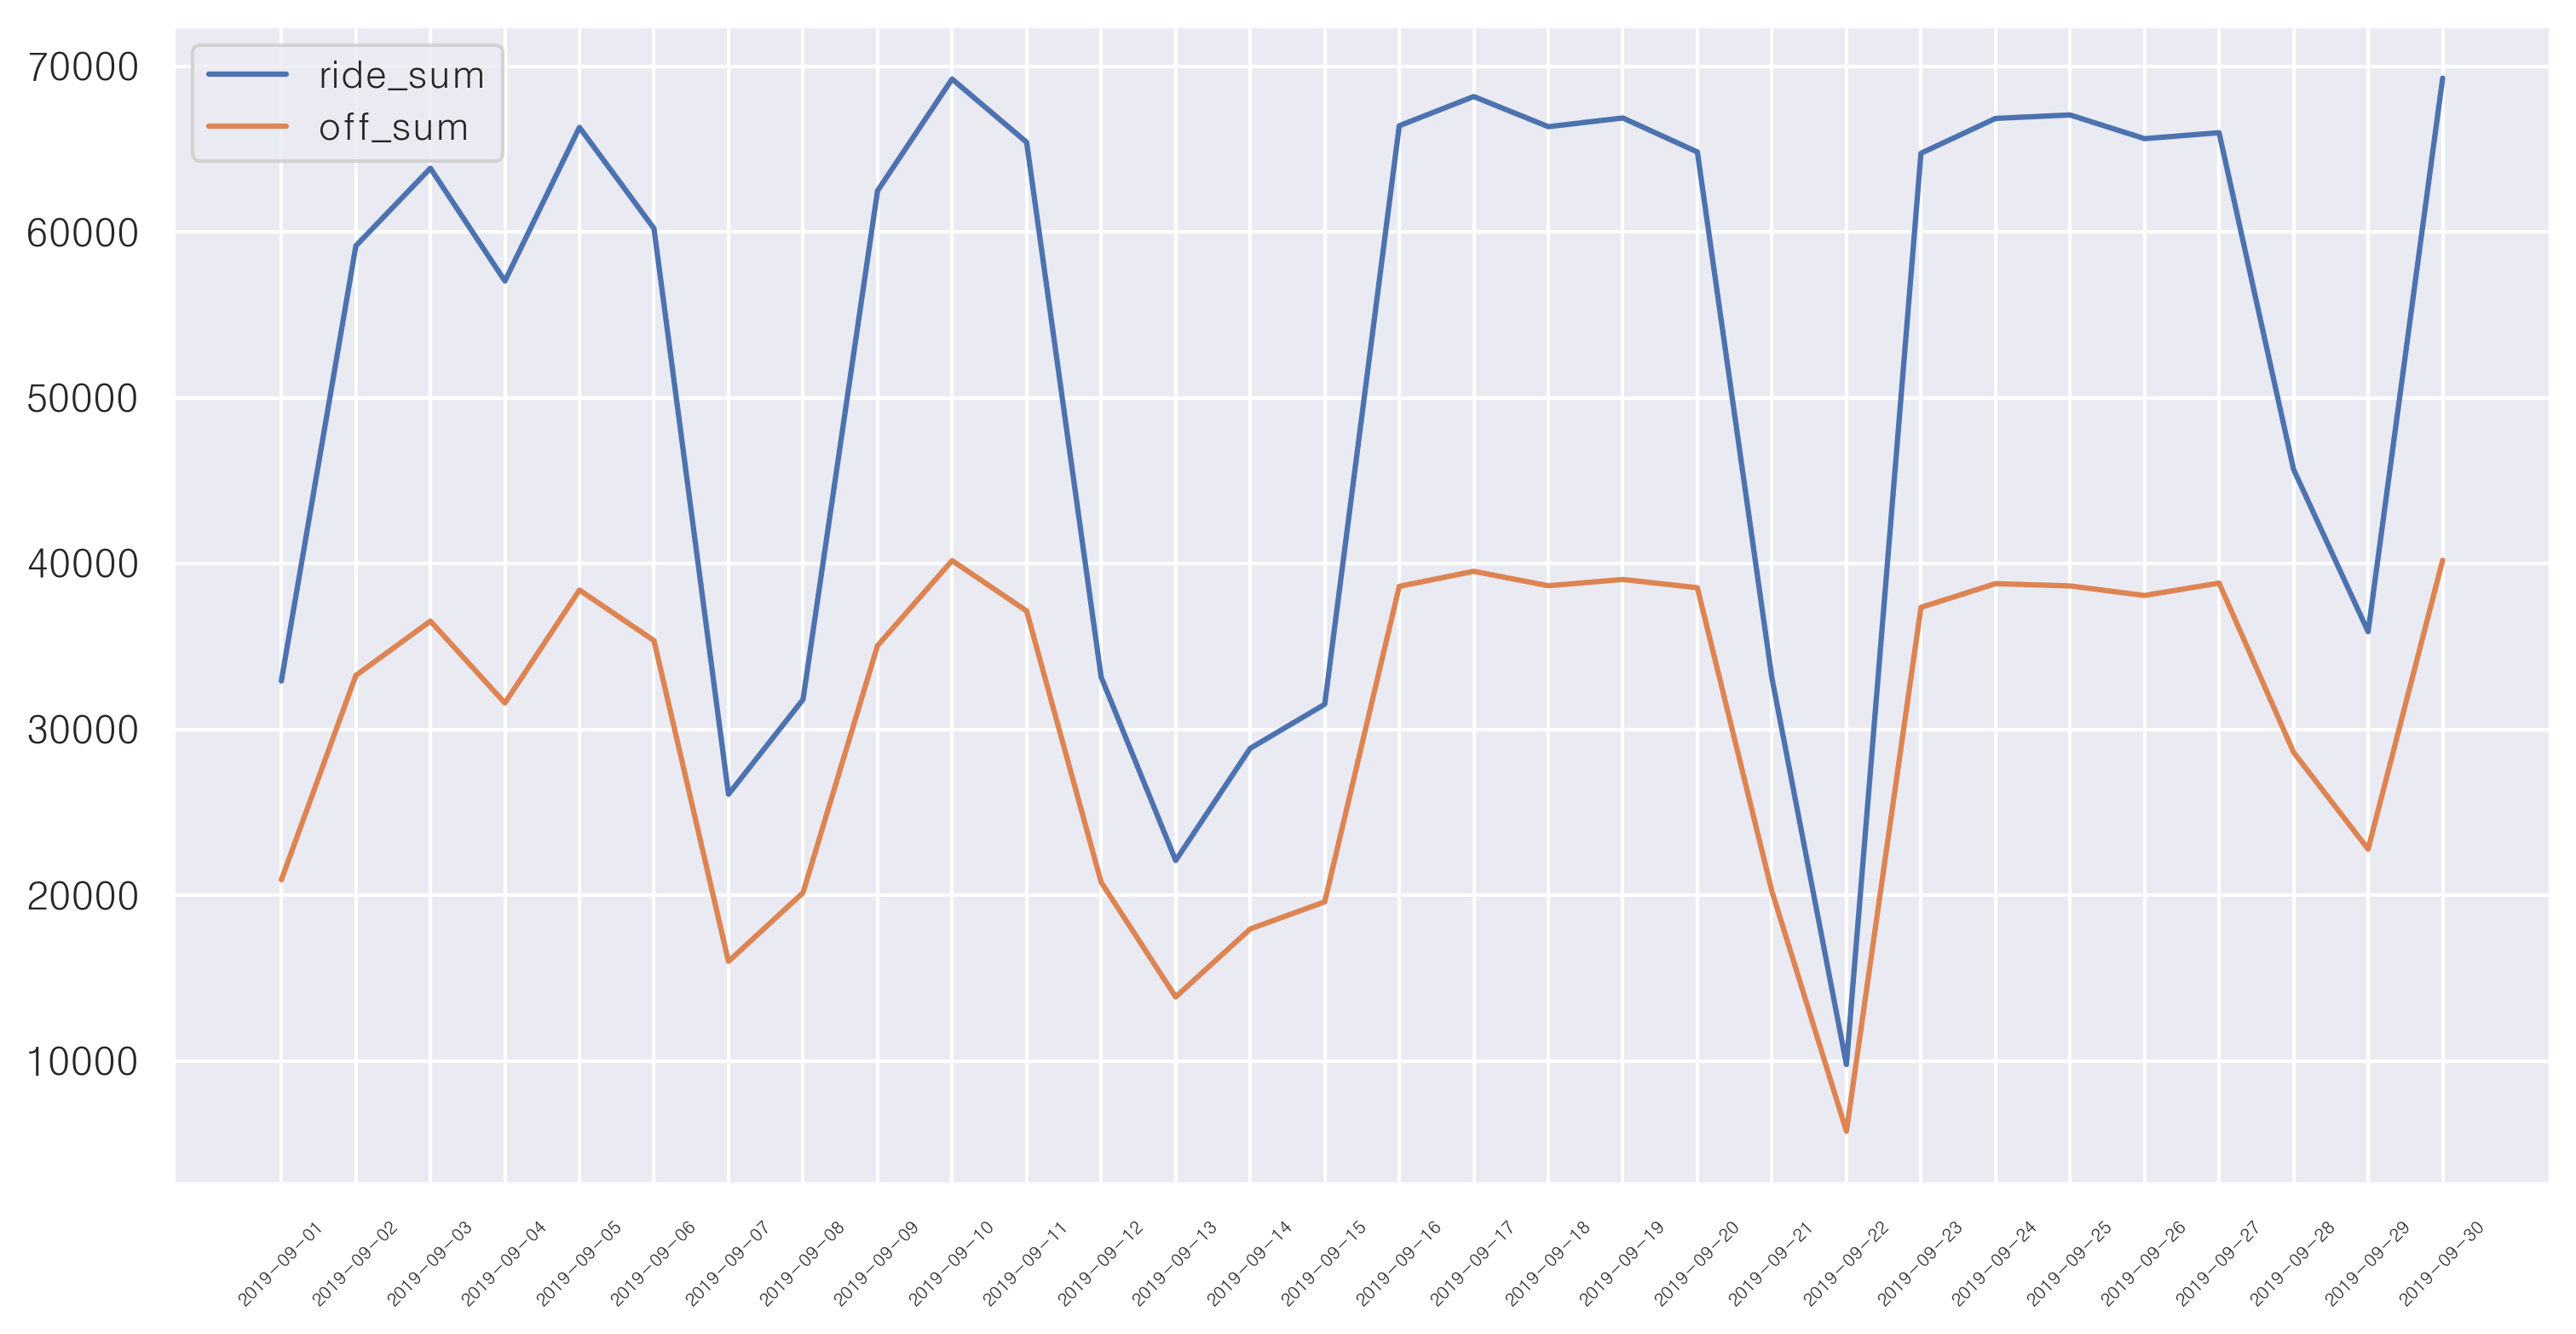

In [34]:
#날짜별로 각 변수를 더한 데이터 프레임 생성
grouped_date=raw_data.groupby('date').sum()
grouped_date.tail(2)

#ride_sum,off_sum eda
#오전시간에 승하차인원이 많다는 것은 그날의 유동인구가 많다는 것을 의미한다.
plt.figure(figsize=(12,6))
plt.plot(grouped_date['ride_sum'] , label="ride_sum")
plt.plot(grouped_date['off_sum'] , label="off_sum")
plt.xticks(fontsize=5,rotation=45)
plt.legend()
plt.show()

### 2. bus_route_id
#### 비정상적인 운행을 하는 노선 분석
- 가벼운 분석을 위해 raw_train 이 아닌 train을 사용함.
- bus_bts는 데이콘에서 train,test와 함께 제공한 또 다른 데이터이다.

In [2]:
train=pd.read_csv('train.csv')

# 분석을 위해 컬럼명 수정
train.rename(columns={'6~7_ride': 'ride6', '7~8_ride': 'ride7', '8~9_ride': 'ride8',\
                      '9~10_ride': 'ride9', '10~11_ride': 'ride10', '11~12_ride': 'ride11', 
                      '6~7_takeoff': 'off6', '7~8_takeoff': 'off7', '8~9_takeoff': 'off8', \
                      '9~10_takeoff': 'off9', '10~11_takeoff': 'off10', '11~12_takeoff': 'off11',\
                      '18~20_ride': 'ride18'},inplace=True)

In [3]:
train.shape 

(415423, 21)

# bus_bts

In [4]:
bus_bts=pd.read_csv('bus_bts.csv')

In [5]:
bus_bts.head(5)

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [7]:
#한달중 특정일에만 이용된 노선들
df2=train.groupby('bus_route_id').date.unique().reset_index()
d_counts=[len(df2.loc[i].date) for i in range(len(df2))]
df2['d_counts']=d_counts
df2.tail(2)

,bus_route_id,date,d_counts
611,32810000,"[2019-09-01, 2019-09-03, 2019-09-04, 2019-09-0...",22
612,32820000,"[2019-09-01, 2019-09-02, 2019-09-03, 2019-09-0...",25


In [8]:
#한달에 하루만 이용된 노선
d_one=df2.query('d_counts==1').reset_index()
d_one.tail(2)

,index,bus_route_id,date,d_counts
27,559,32090000,[2019-09-23],1
28,610,32770000,[2019-09-02],1


In [9]:
#한달에 하루만 운영된 노선들이 그 날에 총 몇번 운영되었는가?
df3=pd.merge(df,d_one)
df3.tail(2)

,bus_route_id,counts,index,date,d_counts
27,28800000,1,344,[2019-09-04],1
28,31040000,1,478,[2019-09-10],1


In [10]:
#한달중 하루만 10번이상 운영된 노선들 -> outliers2로 저장한다.
outliers2=df3.query('counts>=10')
outliers2

,bus_route_id,counts,index,date,d_counts
0,31380000,33,501,[2019-09-20],1
1,29940000,33,413,[2019-09-11],1
2,23630000,28,159,[2019-09-09],1
3,30210000,24,433,[2019-09-06],1
4,32770000,23,610,[2019-09-02],1
5,27140000,16,242,[2019-09-02],1
6,32090000,15,559,[2019-09-23],1
7,29550000,11,392,[2019-09-22],1


In [11]:
route_ids=outliers2['bus_route_id']
route_ids

0    31380000
1    29940000
2    23630000
3    30210000
4    32770000
5    27140000
6    32090000
7    29550000
Name: bus_route_id, dtype: int64

In [12]:
#이 값(183)이 len(outliers2_bts)과 다른 이유 : null 값이 빠져서. 
outliers2.counts.sum()

183

In [13]:
#outliers2를 이용한 이용자들의 탑승/하차 정류장의 위치를 지도에 나타내기

In [14]:
outliers2_bts=pd.DataFrame()
for i in range(len(route_ids)):
    a=bus_bts[bus_bts.bus_route_id==route_ids[i]]
    outliers2_bts=pd.concat([outliers2_bts,a])
outliers2_bts.reset_index(inplace=True)
outliers2_bts

,index,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,971502,1.010010e+15,31380000,149793473,2019-09-20,07:42:47,291,천수동,2019-09-20,07:46:40,294.0,고으니모르국립제주박물관,1,1
1,971503,1.010010e+15,31380000,149793473,2019-09-20,07:42:50,291,천수동,2019-09-20,07:47:43,422.0,거로입구,4,1
2,971504,1.010001e+15,31380000,149793473,2019-09-20,07:58:41,2898,도련초등학교,2019-09-20,08:14:12,293.0,국립제주박물관,1,1
3,971505,1.019150e+15,31380000,149793473,2019-09-20,08:00:51,2896,오름중학교,2019-09-20,08:05:40,243.0,화북주공아파트입구,2,1
4,971506,1.019160e+15,31380000,149793473,2019-09-20,08:04:43,1393,화북휴먼시아,2019-09-20,08:04:50,1393.0,화북휴먼시아,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,1423324,9.411160e+15,29550000,149797069,2019-09-22,11:00:39,443,제주한라대학교,2019-09-22,11:15:50,443.0,제주한라대학교,1,1
430,1426888,4.599012e+15,29550000,149797069,2019-09-22,07:16:38,589,큰동네,NaN,NaN,NaN,NaN,1,1
431,1426889,3.762782e+14,29550000,149797069,2019-09-22,07:25:39,589,큰동네,NaN,NaN,NaN,NaN,1,1
432,1426892,5.531770e+15,29550000,149797069,2019-09-22,08:34:24,375,도련1동,NaN,NaN,NaN,NaN,1,1


In [16]:
#get_off info가 기록되지 않은 row는 총 184개 이다. 
outliers2_bts.isnull().sum()

index                    0
user_card_id             0
bus_route_id             0
vhc_id                   0
geton_date               0
geton_time               0
geton_station_code       0
geton_station_name       0
getoff_date            184
getoff_time            184
getoff_station_code    184
getoff_station_name    184
user_category            0
user_count               0
dtype: int64

In [17]:
#getoff가 존재하는 행 개수
433-184

249

In [18]:
#station_code별 lat,long 얻기
lat=train.groupby('station_code').latitude.unique().reset_index()
long=train.groupby('station_code').longitude.unique().reset_index()
station_lat_long=pd.merge(lat,long).astype({'latitude':'float','longitude':'float'})
station_lat_long

,station_code,latitude,longitude
0,1,33.52438,126.54433
1,2,33.49527,126.45618
2,3,33.49546,126.45623
3,4,33.49488,126.46137
4,5,33.49508,126.46122
...,...,...,...
3558,6115048,33.49558,126.95411
3559,6115052,33.51123,126.96567
3560,6115059,33.50731,126.95093
3561,6115100,33.24873,126.50799


In [19]:
#outliers2_area : outliers2_bts에 위도,경도 정보 추가
geton=pd.merge(outliers2_bts,station_lat_long,left_on='geton_station_code',right_on='station_code').reset_index(drop=True)
getoff=pd.merge(outliers2_bts,station_lat_long,left_on='getoff_station_code',right_on='station_code').reset_index(drop=True)
getoff=getoff[['getoff_station_code','latitude', 'longitude']].rename(columns={'latitude':'off_latitude','longitude':'off_longitude'})
outliers2_area=pd.merge(geton,getoff,how='left',on='getoff_station_code')
outliers2_area=outliers2_area.drop_duplicates().reset_index()
outliers2_area.drop(columns=['level_0','index'],inplace=True)
outliers2_area.rename(columns={'latitude':'on_latitude','longitude':'on_longitude'},inplace=True)
outliers2_area.tail(2)

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count,station_code,on_latitude,on_longitude,off_latitude,off_longitude
432,4.599012e+15,29550000,149797069,2019-09-22,07:16:38,589,큰동네,NaN,NaN,NaN,NaN,1,1,589,33.48923,126.59697,NaN,NaN
433,3.762782e+14,29550000,149797069,2019-09-22,07:25:39,589,큰동네,NaN,NaN,NaN,NaN,1,1,589,33.48923,126.59697,NaN,NaN


In [20]:
#outliers2_area의 위치를 지도에 나타내는 함수
#빨강: 승차, 파랑: 하차 
def map_outliers2_area(num,outliers2,outliers2_area):
    outliers2_area_num=outliers2_area[outliers2_area.bus_route_id==outliers2.loc[num,'bus_route_id']]
    map_osm = folium.Map(location=[33.48944, 126.48508], zoom_start= 11)
    for i in outliers2_area_num.index:
        folium.CircleMarker([outliers2_area_num.loc[i,'on_latitude'], outliers2_area_num.loc[i,'on_longitude']],\
                            color='red',fill_color='#red').add_to(map_osm)
    
    outliers2_area_num2=outliers2_area[outliers2_area.bus_route_id==outliers2.loc[num,'bus_route_id']]
    outliers2_area_num2.dropna(inplace=True)
    outliers2_area_num2.reset_index()
    for i in outliers2_area_num2.index:
        folium.CircleMarker([outliers2_area_num2.loc[i,'off_latitude'], outliers2_area_num2.loc[i,'off_longitude']],\
                            color='blue',fill_color='#blue').add_to(map_osm)
    
    return map_osm

#map_0~map_7 변수 생성
map_num=[]
for num in range(8):
    map_num.append(map_outliers2_area(num,outliers2,outliers2_area))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [29]:
outliers2

,bus_route_id,counts,index,date,d_counts
0,31380000,33,501,[2019-09-20],1
1,29940000,33,413,[2019-09-11],1
2,23630000,28,159,[2019-09-09],1
3,30210000,24,433,[2019-09-06],1
4,32770000,23,610,[2019-09-02],1
5,27140000,16,242,[2019-09-02],1
6,32090000,15,559,[2019-09-23],1
7,29550000,11,392,[2019-09-22],1


In [21]:
# map_num[0]: route_id: 31380000, count:33 , date : 2019-09-20 
# map_num[0]~map_num[7] 까지 존재하며, 이는 outliers2 에 속한 노선(한달중 하루만 10번이상 운영된 노선들) 이다. 
# 2019년 9월 20일에만 33번 운행된 노선(31380000)
# 해당 노선을 이용한 승객이 승차하고 하차한 위치를 나타낸 지도
# 빨강: 승차, 파랑: 하차 
map_num[0]

In [22]:
#2019-09-11
map_num[1]

In [23]:
#2019-09-09
map_num[2]

In [24]:
#2019-09-06
map_num[3]

In [25]:
#2019-09-02
#제주181, 281번 노선과 매우 비슷함. 두 노선의 경우에는 실제로 굉장히 혼잡한 인기 노선이라고 함. 그런데 왜 이 노선은 2일에만 운행 한것일까?
#참고 기사 : http://www.jejudomin.co.kr/news/articleView.html?idxno=117422
#2일에만 추가 운행된 것인가?? 
map_num[4]

In [26]:
#2019-09-02
map_num[5]

In [27]:
#2019-09-23
map_num[6]

In [28]:
#2019-09-22
map_num[7]

### 중간결론 
    1) 만약, 승하차 지역이 한 곳에 몰려있다면 -> 단체 이동일 가능성이 높다.
        but 모두 다른 지역에 퍼져있음 -> 각 개인별 이동인 것 같음.
    2) 만약, 승하차 지역이 뚜렷하게 구분되어 있다면 -> 한 방향으로만 이동하는 노선일 가능성이 높다.
        but 모두 승하차 지역의 구분이 명확하지 않음-> 쌍방향 이동 노선임
    3) 비정상적운행노선들의 대부분이 유달리 유동인구가 적은 지역을 지나는 노선이 아니다. 비공식적으로 추가 편성된 노선이거나, 일시적으로 운행이 중단된 것이 아닐까? 그러나 이는 추측일 뿐이다. 